# Final Project - MAE 6226

## Hydrofoiling and the Need for Speed

### Outline

This project seeks to observe the differences between using a flapped hydrofoil versus a non-flapped hydrofoil where only the flap angle can be change for the flapped foil and angle of attack for the non-flapped hydrofoil. The two prime examples of these different systems can be found in the America's Cup and the International Moth circuit. Due to rule restrictions the America's Cup boats were not able to have an active trim on the foil itself, but were able to change the foils overall angle inherently changing it's angle of attack. The Moth is different, however in that the angle of attack of the foils does not actively change, rather the angle of the flap on its foils are allowed to change. While each of these systems have their benefits and drawbacks from a mechanical perspective, comparing the two from a lift perspective provides an insight into their differences. The following notebook seeks to compare the lift and drag for these two foils to provide a better case for chosing each foil given the circumstances.

### Introduction

#### The America's Cup and the AC50

First competed for in 1851, the America's Cup is the oldest trophy still competed for today in all of international sport. The rules and terms of the regatta are determined by the previous year's defender who is then given a challenge by another nation that wishes to compete. One of the key components of the America's Cup is that is has always been a race of trying to create the best technology to beat your opponent. Each edition of the Cup creates a set of class rules that each of the teams must include in the design of their boat. Outside of those rules the teams are able to make any changes or adjustments to the boat that they desire. 
<img src="resources/america_sv.jpg">
<center>Figure 1: S/Y America winner of the first America's Cup</center>

The most recent edition of the America's Cup, the 35th, took place in 2017 in Hamilton, Bermuda. Oracle Team USA was the defender of the cup after winning the event in 2013, and was placed up against Emirates Team New Zealand in the finals. This edition of the cup was one of the most technologically advanced sailing races in all of sailing history, featuring hydrofoiling catamarans with speeds up to 50 knots (58 mph). 

The biggest technological breakthrough of the cup has been the ability to hydrofoil over the entire race course. The boats raced were 50 ft in length and are shown below:

<img src="resources/etnz_picture.jpg">
<center>Figure 2: Emirates Team New Zealand Winner of the most recent America's Cup</center>

#### The Standard for Hydrofoiling Sailboats - the Moth

Although the Moth was first created in 1930s, the boat's design did not include a hydrofoil until 2001 when Andy Paterson, a boat designer from the Isle of Wight, created a three foil Moth that was much faster than its non-foiling counterparts. 
<img src="resources/moth_tri_foil.jpg" width ="200" height = "200">
<center> Figure 3: Andy Paterson's original tri-foiling Moth Design </center>

Within the sailing community there are three types of design schemes when it comes to boat racing. There is one-design, box-design, and open-design. One-design is for a class of boats usually built by one manufacturer to one specific design that cannot be changed, anything that is not in the design rules of the boat cannot be done to enhance the boat's performance. Box-design means that the boat has to follow certain design criteria, usually size, weight, and number of adjustable controls, but oustide of those rules anything can be done to the boat. In the case of the two boats listed, both the Moth and AC50 follow this set of design rules. The final design is open-design where the boat can be made to any set of rules that the builder so desires. With the box design for the Moth, it meant that the hydrofoils added to the boat were initially allowed. At the world championship later in 2001, the winner, Brett Burvill, sailed with hydrofoils. The International Moth Class initially reacted with banning the hydrofoiling aspect of the boat. The design changed to allow for a boat with just two foils, a main foil and a rudder to help control steering and lift. 

<img src="resources/foiling_moth.jpeg">
<center> Figure 4: Current foiling design for the Moth </center>


<img src="resources/foiling_moth_water.jpg" width = "500" height = "500">
<center> Figure 5: Current foiling design for the Moth in the water </center>

#### Foils for the two boats

The main goal with hydrofoiling is to reduce the wetted surface area of the boat (surface area of the boat touching the water), thus reducing drag allowing the boat to travel at higher speeds. The two methods by which these boats achieve hydrofoiling is drastically different in both complexity and scale despite the same end goal. The Moth is a much smaller boat and smaller platform, but it uses a more complex foil control in principle. The system uses a "wand" that hangs out in front of the boat and makes contact with the water. This "wand," through a series of levers and push bars, actively changes the angle of the flap on the center foil as the boat begins to hydrofoil.

<img src="resources/moth_t_foil.jpg" width = "400" height = "400">
<center>Figure 6: Hydrofoils for the Moth with flapped wing design</center>

As seen in the above figure, the black line shows the point of separation between the flap of the foil and the main part of the foil itself. This flap is then continually adjust by the "wand" as the boat rises or falls with respect to the surface level of the water.

The AC50 on the other hand uses a soild carbon fiber hydrofoil that is all one piece. This board is insterted into a case in the side of the boat that alows for the foil to be rasied or lowered within the boat and change angle forwards and backwards through a system of hydraulics. 

<img src="resources/AC50_foil.jpeg">
<center>Figure 7: Solid hydrofoil found on the AC50 catamaran</center>

While the foil can be rasied or lowered, this only affects how high the boat rises out of the water and not the lift itself. The lift comes from changing the angle of the foil which is just changing the angle of attack of a single hydrofoil.

## Setting up the Airfoils and Model

For this comparison, we will be using a NACA 23012 airfoil as a stand in for our hydrofoil. While this oversimplifies the drastic differences in foil shape and design for these two boats, it allows for a comparison of the concept behind each design. This also allows for us to use some of the previously developed functions and theories examined in earlier exercies from the semester mainly knowing the point about which the flap changes on the hydrofoil. The basic idea behind this is to develop a panel method for each foil profile and then compare the two as the applicable changes for each airfoil take shape.

In [1]:
#Setting up the notebook with the correct data
import numpy
import math
from matplotlib import pyplot as plt
%matplotlib inline
#Gives us the functions we have previously created and will be explained as the apply in each scenario
%run resources/resources.ipynb

#Loading the airfoil data for each part of our foils
with open('resources/NACA23012_MainFoil.csv', 'r') as infile:
    x_main, y_main = numpy.loadtxt(infile, delimiter=',', dtype=float, unpack=True)
    
with open('resources/NACA23012_FlapFoil.csv', 'r') as infile:
    x_flap, y_flap = numpy.loadtxt(infile, delimiter=',', dtype=float, unpack=True)
    
with open('resources/NACA23012_Full_Foil.csv', 'r') as infile:
    x_full, y_full = numpy.loadtxt(infile, delimiter=',', dtype=float, unpack=True)

Let's first run through creating our airfoil with the flap and doing a simple check of how it acts:

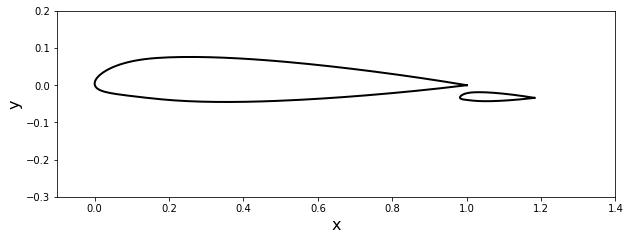

In [2]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x_main, y_main, color='k', linewidth=2, linestyle='-')
plt.plot(x_flap, y_flap, color='k', linewidth=2, linestyle='-')
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.4)
plt.ylim(-0.3, 0.2);

As seen in the above data we now have a NACA 23012 airfoil that has a flap behind it. This will be our representation of the foil found on the Moth sailboat.

Next we want to take this collection of points and turn it into a collection of panels for us to utilize the panel method. Since we already have the locations of all of the points along the airfoil, we only need to create panels between the points that define our airfoil. As used in Homework 3, we have a function called `disc_define_panels` that takes the x and y coordinates of each point and turns the entire airfoil into panels. We will then use the function of `numpy.append` to create an extended array for our panels. 

In [3]:
main_panels = disc_define_panels(x_main, y_main)
flap_panels = disc_define_panels(x_flap, y_flap)
panels = numpy.append(main_panels, flap_panels)

Now that we have created our panels, we should check to see what the panels look like in comparison to the model of the wing that we had created previously:

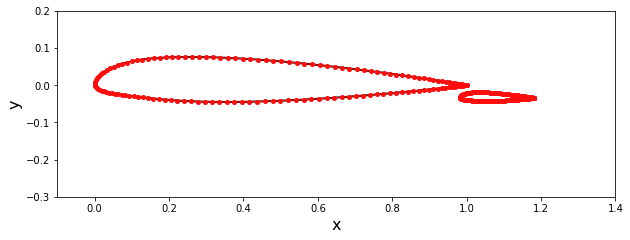

In [4]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x_main, y_main, color='k', linewidth=2, linestyle='-')
plt.plot(x_flap, y_flap, color='k', linewidth=2, linestyle='-')
plt.plot([panel.xc for panel in main_panels], [panel.yc for panel in main_panels],
         color='#FF0D0D', linewidth=1, marker='o', markersize=4)
plt.plot([panel.xc for panel in flap_panels], [panel.yc for panel in flap_panels],
         color='#FF0D0D', linewidth=1, marker='o', markersize=4)
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.4)
plt.ylim(-0.3, 0.2);

We see that we have created our airfoil matching the shape from before and we can notice that the panels are created between the individual points found on the above graph. Now that we have given a visual verification of our data we can take this and start to create our sources and vorticies that will allow us to observe the lift and drag as well as our coefficent of pressure. Similar to the lesson 11, we will build a linear system using a Matrix to develop the normal velocity for the flow over the foil 

In [5]:
#Source contribution to the matrix
A_source = source_contribution_normal(panels)
#Vortext contribution to the matrix
B_vortex = vortex_contribution_normal(panels)
#Using the previously defined freestream class
u_inf = 1.0
alpha = 0.0
freestream = Freestream(u_inf, alpha)
#Using a modified form of the singularity matrix equation to build up all of our matricies into 
#one including the mainfoil and the flap
A = total_build_matrix(panels, A_source, B_vortex)
#Using a modified form of the right hand side matrix to build up the freestream that does not depend upon the strengths
#of sources and vorticies
b = total_build_rhs(panels, freestream)

#Find the unknown strengths required for the system using linalg.solve
sigma = numpy.linalg.solve(A,b)

#Find the source strength and store that on each panel
for i, panel in enumerate(panels):
    panel.sigma = sigma[i]

#Store the circulation density of each the flap and mainfoil
gamma_main = sigma[-2]
gamma_flap = sigma[-1]

#Place the circulation into matrix
gamma = numpy.append(gamma_main, gamma_flap)

Now that we have defined the normals for both our main foil and flap, we can use this to get the tangential velocity along the airfoil as well as the pressure coefficient. By getting the pressure coefficent we can use this as a check to see if the airfoil follows a profile typical of a wing at 0 angle of attack and 0 flap angle.

In [6]:
#Find the tangential velocity at the center of each panel
compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)

In [7]:
#Cp at center of each panel
compute_pressure_coefficient(panels, freestream)

In [8]:
N = panels.size
#Getting main_panels and flap_panels back from appended panels array
main_panels, flap_panels = panels[:int(N/2)], panels[int(N/2):]

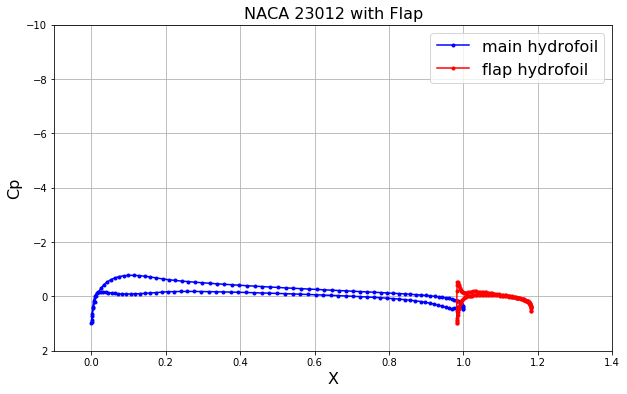

In [9]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('Cp', fontsize=16)
plt.plot([panel.xc for panel in main_panels],
            [panel.cp for panel in main_panels],
           label='main hydrofoil', color='b', linestyle='-', marker='o', markersize=3)
plt.plot([panel.xc for panel in flap_panels],
            [panel.cp for panel in flap_panels],
           label='flap hydrofoil', color='r', linestyle='-', marker='o', markersize=3)
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.4)
plt.ylim(2.0, -10.0)
plt.title('NACA 23012 with Flap', fontsize=16);

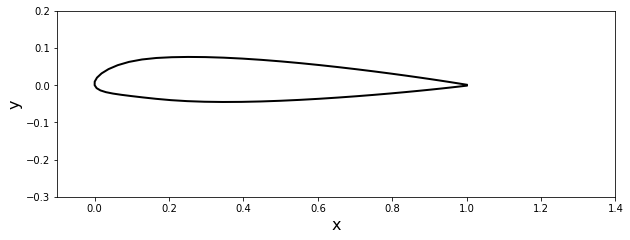

In [10]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x_full, y_full, color='k', linewidth=2, linestyle='-')
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.4)
plt.ylim(-0.3, 0.2);

In [11]:
panel_full = disc_define_panels(x_full, y_full)

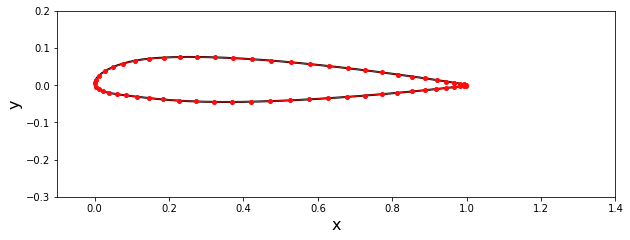

In [12]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x_full, y_full, color='k', linewidth=2, linestyle='-')
plt.plot([panel.xc for panel in panel_full], [panel.yc for panel in panel_full],
         color='#FF0D0D', linewidth=1, marker='o', markersize=4)
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.4)
plt.ylim(-0.3, 0.2);

In [13]:
#Setting up the same system of equations, but for the single hydrofoil
u_inf = 1.0
alpha = 0.0
A_source_f = source_contribution_normal(panel_full)
B_vortex_f = vortex_contribution_normal(panel_full)
freestream_f = Freestream(u_inf, alpha)
A_f = build_singularity_matrix(A_source_f, B_vortex_f)
b_f = build_freestream_rhs(panel_full, freestream_f)

In [14]:
sigma_f = numpy.linalg.solve(A_f, b_f)

for i, panel in enumerate(panel_full):
    panel.sigma_f = sigma_f[i]

gamma_f = sigma[-1]

In [15]:
compute_tangential_velocity_single(panel_full, freestream_f, gamma_f, A_source_f, B_vortex_f)
compute_pressure_coefficient_single(panel_full, freestream_f)

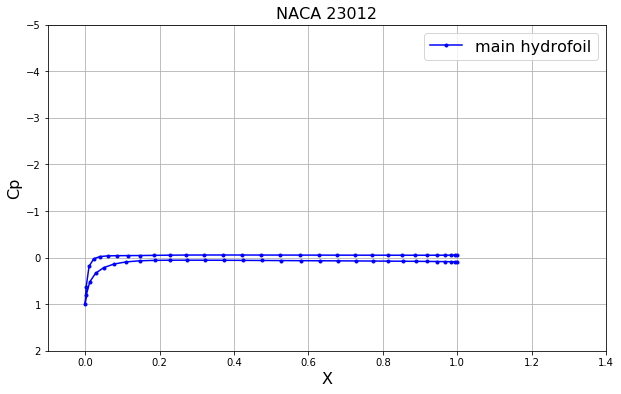

In [16]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('Cp', fontsize=16)
plt.plot([panel.xc for panel in panel_full],
            [panel.cp for panel in panel_full],
           label='main hydrofoil', color='b', linestyle='-', marker='o', markersize=3)
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.4)
plt.ylim(2.0, -5.0)
plt.title('NACA 23012', fontsize=16);

Now that we have discretized how the two airfoils differ with respect to their pressures, we will exam the differences in lift without changing the angle of attack or flap angle.

In [17]:
L = 0
for panel in panels:
    L -= panel.cp*panel.length*math.sin(panel.beta)
print('The lift for an flapped NACA 23012 without any change in flap angle is:', L)

The lift for an flapped NACA 23012 without any change in flap angle is: 0.271910644469


In [18]:
L_f = 0
for panel in panel_full:
    L_f -= panel.cp*panel.length*math.sin(panel.beta)
print('The lift for an non-flapped NACA 23012 without any change in angle of attack is:', L_f)

The lift for an non-flapped NACA 23012 without any change in angle of attack is: -0.133115453912


Our initial angle of attack 0 we begin to notice that the flapped wing and 0 flap angle has a slightly postive amount of lift whereas the singular wing has a slightly negative amount of lift.

Now that we have begun to see the initial differences, let's start to change the foils and create a graph with the corresponding lift values.

For the flapped airfoil we need to utilize a rotation function to only rotate the flapped part of the function. With the NACA 23012, we know that the flap is pivoted around the point (1.03, -0.054)

In [19]:
xc, yc = 1.03, -0.054
theta = -10

In [20]:
def rotation(x_flap, y_flap, xc, yc, theta):
    theta = math.radians(theta)
    x_rot = (x_flap - xc)*math.cos(theta) + (y_flap - yc)*math.sin(theta) + xc
    y_rot = -(x_flap - xc)*math.sin(theta) + (y_flap - yc)*math.cos(theta) + yc
    
    return x_rot, y_rot

In [21]:
x_rot, y_rot = rotation(x_flap, y_flap, xc, yc, theta)

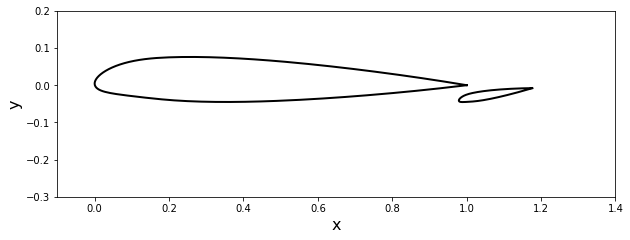

In [22]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x_main, y_main, color='k', linewidth=2, linestyle='-')
plt.plot(x_rot, y_rot, color='k', linewidth=2, linestyle='-')
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.4)
plt.ylim(-0.3, 0.2);

In [23]:
theta = numpy.linspace(-10, 10, 100)

In [149]:
j = 0
L = numpy.zeros((len(theta)), dtype=float)
D = numpy.zeros((len(theta)), dtype=float)
while j < len(theta):
    x_rot, y_rot = rotation(x_flap, y_flap, xc, yc, theta[j])
    flap_panels = disc_define_panels(x_rot, y_rot)
    panels = panels = numpy.append(main_panels, flap_panels)
    
    A_source = source_contribution_normal(panels)
    B_vortex = vortex_contribution_normal(panels)
    
    A = total_build_matrix(panels, A_source, B_vortex)
    b = total_build_rhs(panels, freestream)
    
    sigma = numpy.linalg.solve(A,b)

    for i, panel in enumerate(panels):
        panel.sigma = sigma[i]

    gamma_main = sigma[-2]
    gamma_flap = sigma[-1]
    gamma = numpy.append(gamma_main, gamma_flap)
    
    compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)
    compute_pressure_coefficient(panels, freestream)
    
    L[j] = 0
    for panel in panels:
        L[j] -= panel.cp*panel.length*math.sin(panel.beta)
    j = j+1

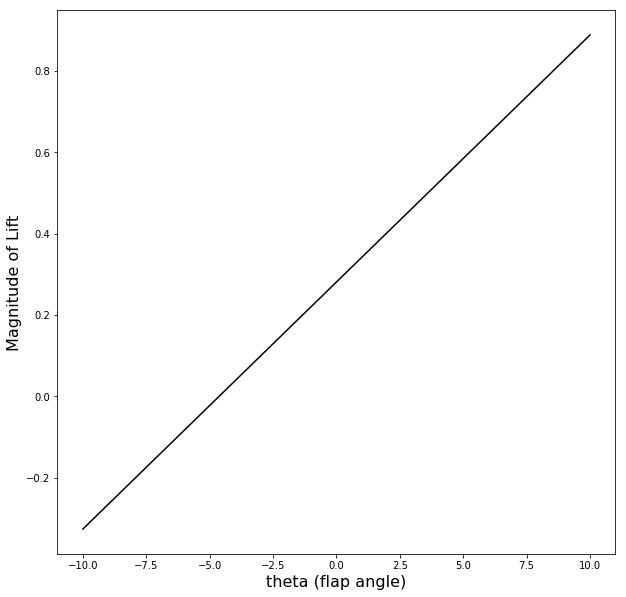

In [150]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('theta (flap angle)', fontsize=16)
plt.ylabel('Magnitude of Lift', fontsize=16)
plt.plot(theta, L, color='k')

Now that we have collected the lift for changing the angle of the flap, let's change the angle of attack for the single airfoil to calculate the lift.

In [32]:
j = 0
alpha_f = numpy.linspace(-10, 10, 300)
L_f = numpy.zeros((len(alpha_f)), dtype=float)
while j < len(alpha_f):
    freestream_f = Freestream(u_inf, alpha_f[j])
    A_f = build_singularity_matrix(A_source_f, B_vortex_f)
    b_f = build_freestream_rhs(panel_full, freestream_f)
    
    sigma_f = numpy.linalg.solve(A,b)

    for i, panel in enumerate(panel_full):
        panel.sigma = sigma_f[i]

    gamma_f = sigma_f[-1]
    
    compute_tangential_velocity_single(panel_full, freestream_f, gamma_f, A_source_f, B_vortex_f)
    compute_pressure_coefficient_single(panel_full, freestream_f)
    
    L_f[j] = 0
    for panel in panel_full:
        L_f[j] -= panel.cp*panel.length*math.sin(panel.beta)
    j = j+1

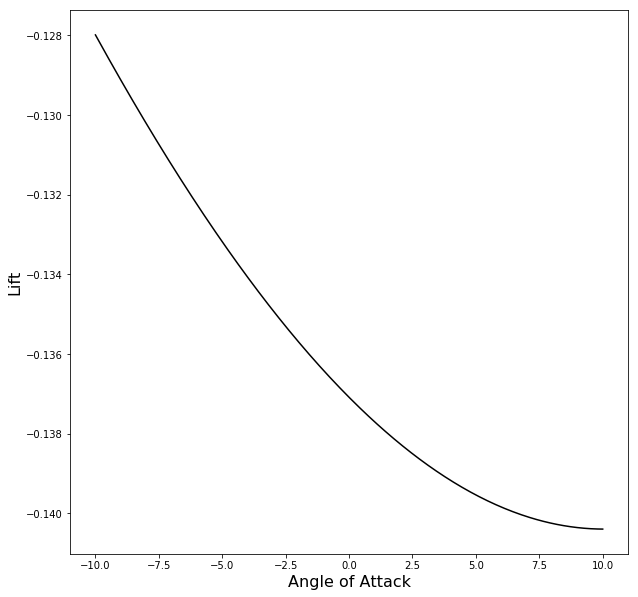

In [35]:
width = 10
plt.figure(figsize=(width,width))
plt.xlabel('Angle of Attack', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.plot(alpha_f, L_f, color='k')

## Final Words

What we begin to notice with these two systems is that the lift created by changing the angle of each component drastically differs. We see that with changing the flap angle we continually create more lift in doing so. If we look at changing the angle of attack for the single airfoil we seet that there is a tipping point where it becomes two much angle and starts to reduce in lift. Due to this system being potential flow, we cannot see the increased drag due to the change in the flap angle or the angle of attack. This would need to include a no slip condition that cannot be determined through the use of the panel method. When observing these two methods it shows why the flap control of the Moth has been extremely successful for a smaller boat. On smaller boats it becomes more difficult to change the angle of attack from a human strength perspective, but the flap control requires no direct human control. With the larger AC50, they include electronics that allow for the foil angle to be optimized to a very fine degree. This is also controlled by hydraulics that allows for the system to be controlled through a push of a button. Further analysis on these systems would help to determine the best cost and method for controlling the foiling of the boat

## Refrences

1. Airfoil Tools, website providing airfoil data.
2. America's Cup. (2016, June 28). In Encyclopedia Britannica. Retrieved November 21, 2017, from https://www.britannica.com/topic/Americas-Cup
3. America’s Cup Class Rules. (2015, December 8). America’s Cup Event authority
4. Bergsma, F. M., Zaaijer, K. S., & Moerke, N. (n.d.). CONTROLLING THE RIDE HEIGHT OF HYDRO-FOILING BOATS IN ... Retrieved November 21, 2017, from http://www.oossanen.nl/beheer/wp-content/uploads/2015/02/029-Bergsma-et-al-v2.pdf![image.png](attachment:image.png)